In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato data.csv')

In [3]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [4]:
print("Data Summary:")
print(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB
None


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
print(f'The shape of dataset is : {df.shape}\nThe size of dataset is : {df.size}')

The shape of dataset is : (6984, 10)
The size of dataset is : 69840


## Customer Preferences by Restaurant Type

In [9]:
df['restaurant type'].unique()

array(['Quick Bites', 'Cafe', 'Casual Dining', 'Takeaway, Delivery',
       'Bar, Casual Dining', 'Fine Dining', 'Pub', 'Casual Dining, Bar',
       'Delivery', 'Kiosk', 'Food Court', 'Microbrewery', 'Bar', 'Mess',
       'Bakery', 'Dessert Parlor', 'Beverage Shop', 'Sweet Shop', 'Dhaba',
       'Cafe, Quick Bites', 'Microbrewery, Casual Dining',
       'Dessert Parlor, Beverage Shop', 'Bar, Lounge',
       'Quick Bites, Mess', 'Food Truck', 'Lounge, Bar',
       'Cafe, Dessert Parlor', 'Quick Bites, Beverage Shop',
       'Pub, Casual Dining', 'Pub, Microbrewery',
       'Sweet Shop, Quick Bites', 'Cafe, Bakery', 'Fine Dining, Bar',
       'Bar, Pub', 'Bakery, Quick Bites', 'Bakery, Beverage Shop',
       'Bakery, Dessert Parlor', 'Takeaway', 'Lounge',
       'Microbrewery, Lounge', 'Lounge, Microbrewery',
       'Casual Dining, Microbrewery', 'Casual Dining, Pub',
       'Bakery, Cafe', 'Casual Dining, Cafe', 'Microbrewery, Pub',
       'Cafe, Bar', 'Quick Bites, Cafe', 'Cafe, Casual

In [10]:
Top_Ten_Types = df['restaurant type'].value_counts()[:10]
Top_Ten_Types

restaurant type
Quick Bites           2784
Casual Dining         1620
Cafe                   395
Delivery               346
Takeaway, Delivery     283
Dessert Parlor         212
Bakery                 149
Casual Dining, Bar     121
Beverage Shop          115
Bar                     81
Name: count, dtype: int64

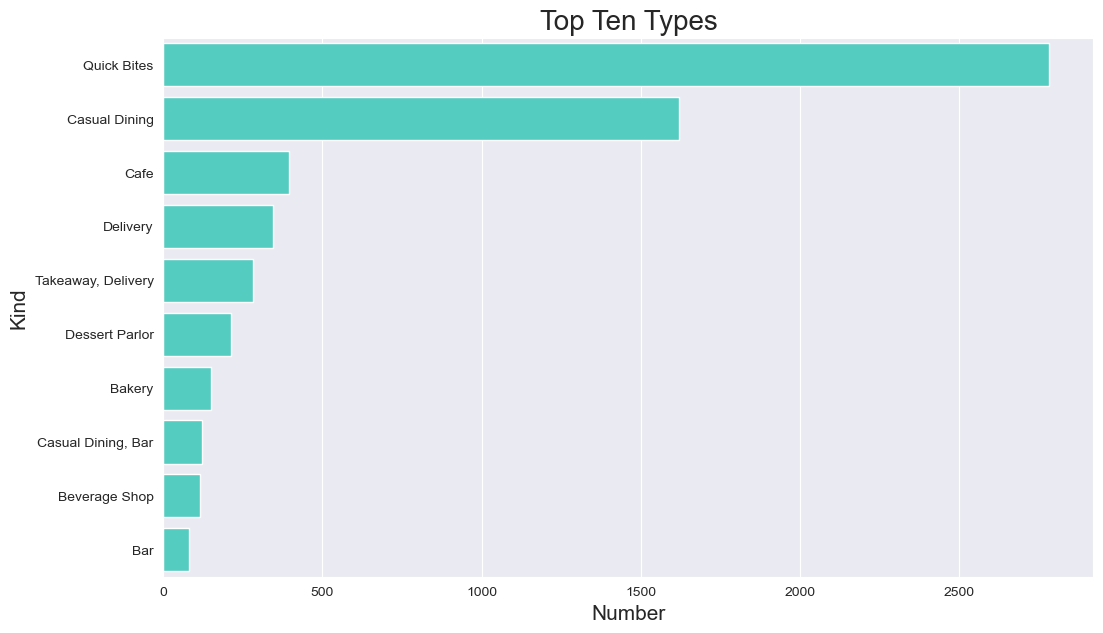

In [11]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.barplot(x=Top_Ten_Types.values, y=Top_Ten_Types.index, color = 'turquoise')
plt.title('Top Ten Types', size = 20)
plt.xlabel('Number', size = 15)
plt.ylabel('Kind', size = 15)
plt.show()

**Observations:**
- The most popular types of restaurants on Zomato are Quick Bites, followed by Casual Dining and Cafes. This suggests that Zomato users tend to order from restaurants that offer convenient and affordable meals.
- Delivery and Takeaway restaurants are also popular, which is unsurprising given that Zomato is a food delivery platform.
- Bakeries and Beverage Shops are the least popular types of restaurants on Zomato. This could be because people are less likely to order baked goods or drinks for delivery.

## Restaurant Ratings Analysis

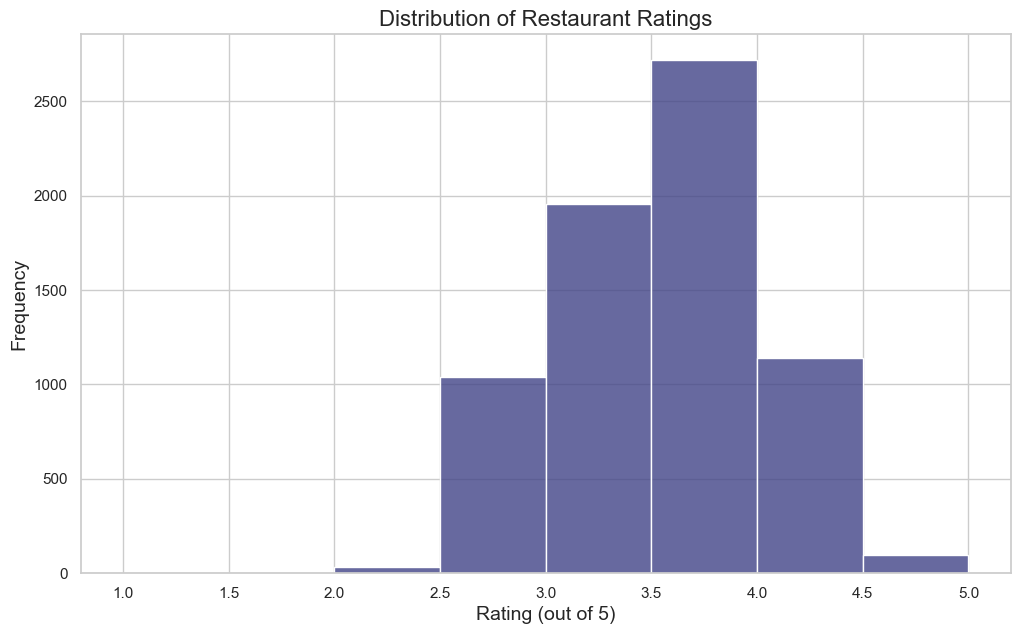

In [14]:
# Set a fixed number of bins to match typical restaurant rating scales
bins = [i * 0.5 for i in range(2, 11)] 

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid") 
color = sns.color_palette("viridis", 4)
sns.histplot(df['rate (out of 5)'], bins=bins, color=color[0], alpha=0.8)
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Rating (out of 5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

**Key Observations:**
- **Left Skew:** The distribution is skewed slightly to the left, suggesting that most restaurants receive average to above-average ratings.
- **Common Rating Range:** Ratings between 3.5 and 4.0 are the most frequent, suggesting many restaurants are viewed as "good" to "very good."
- **Few Low Ratings:** Low ratings (1.0-2.0) are uncommon, which reflects well on the platform's quality.

**Insights:**
- **Highlight Excellence:** Zomato could promote high-rated restaurants to attract more customers.
- **Improve Low-Rated Spots:** Analyzing lower-rated restaurants could reveal improvement opportunities.
- **Benchmarking:** This rating distribution can track changes in customer satisfaction over time.

## Mode of Ordering and Ratings Correlation

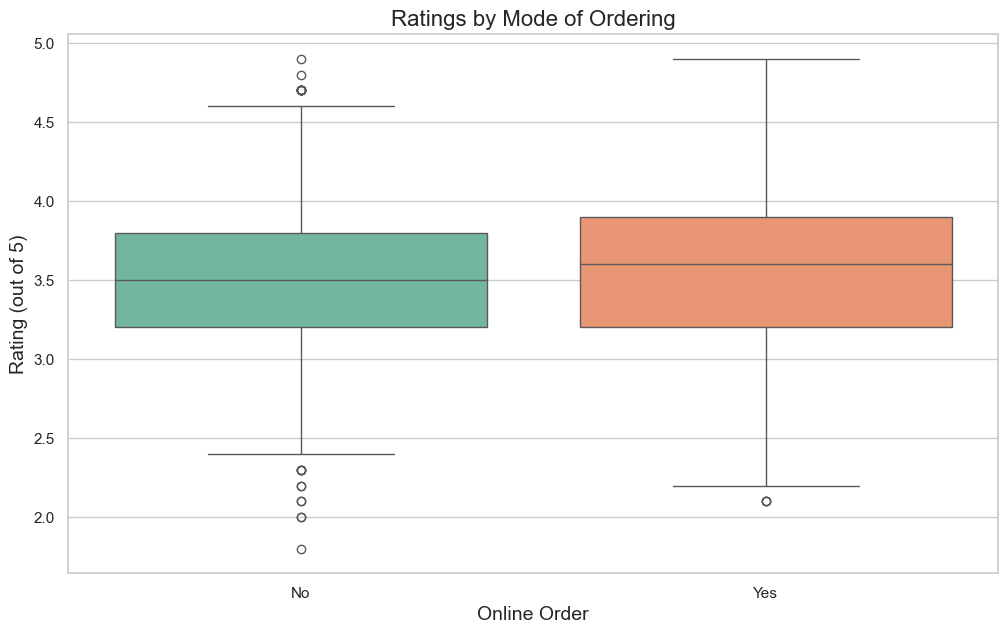

In [17]:
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", 2)
sns.boxplot(x='online_order', y='rate (out of 5)', data=df, hue='online_order', palette=palette, legend=False)
plt.title('Ratings by Mode of Ordering', fontsize=16)
plt.xlabel('Online Order', fontsize=14)
plt.ylabel('Rating (out of 5)', fontsize=14)
plt.show()

**Observations:**
- **Median Rating Difference:** The median rating for restaurants with an online order mode (Yes) is higher than those without (No). This suggests that customers tend to rate restaurants with order modes more favorably.
- **Spread of Ratings:** The distribution of ratings for restaurants with an online order mode is wider, indicating more variability in customer opinions. This could be due to various factors such as differences in order mode experiences, or a larger number of ratings for these restaurants.

## Showing most and least number of rating with thier rates and restaurant names

In [20]:
df[['restaurant name','rate (out of 5)' ,'num of ratings' ]].sort_values(by=['num of ratings'],ascending=False)

,restaurant name,rate (out of 5),num of ratings
1035,Byg Brewski Brewing Company,4.9,16345
6665,Toit,4.7,14956
6242,The Black Pearl,4.7,10413
770,Big Pitcher,4.6,9272
423,Arbor Brewing Company,4.5,8375
...,...,...,...
2165,FOOD ADDA,3.2,4
2937,Indian Spicy Food,3.2,4
2434,Great Moments - Hotel Bangalore International,3.2,2
2588,Height's Cafe - Hotel Bangalore International,3.2,2


**Observations and Insights:**

1. **Highly Rated and Popular Restaurants:**
   - The restaurants with the highest number of ratings are also highly rated, indicating their popularity and strong customer satisfaction. For example, **Byg Brewski Brewing Company** has an impressive rating of **4.9** with **16,345** ratings, which reflects a consistently high-quality dining experience.
   - Similarly, **Toit** and **The Black Pearl** have received a significant number of ratings (14,956 and 10,413 respectively) with ratings of **4.7** each, suggesting they are well-regarded and frequented by many customers.

2. **Correlation Between Popularity and Ratings:**
   - There appears to be a positive correlation between the number of ratings and the overall rating score. The most rated restaurants tend to have higher ratings, indicating that they maintain their quality and reputation even with a large customer base.

3. **Low-Rated and Less Popular Restaurants:**
   - On the other end of the spectrum, restaurants like **FOOD ADDA** and **Indian Spicy Food** have very few ratings (only 4) and lower ratings of **3.2**. These restaurants might be either new, less popular, or potentially have issues that lead to lower customer satisfaction.
   - **Height's Cafe - Hotel Bangalore International** and **Great Moments - Hotel Bangalore International** have even fewer ratings (only 2 each) and the same lower rating of **3.2**. These restaurants may need to focus on improving their offerings or marketing to increase customer engagement.

4. **Business Implications:**
   - **Strategic Focus:** Zomato could consider focusing on promoting highly rated and popular restaurants like Byg Brewski Brewing Company and Toit as flagship dining options in their marketing campaigns, emphasizing quality and customer satisfaction.
   - **Support for Lesser-Known Restaurants:** For restaurants with fewer ratings and lower scores, Zomato might explore opportunities for improvement by providing insights or support, such as customer feedback analysis, promotional activities, or special offers to boost visibility and ratings.
   - **Targeted Promotions:** Understanding the correlation between ratings and the number of reviews can help Zomato design targeted promotions for restaurants that have the potential to improve but may need more visibility to attract customers.

## Identifying which restaurant types receive more offline orders

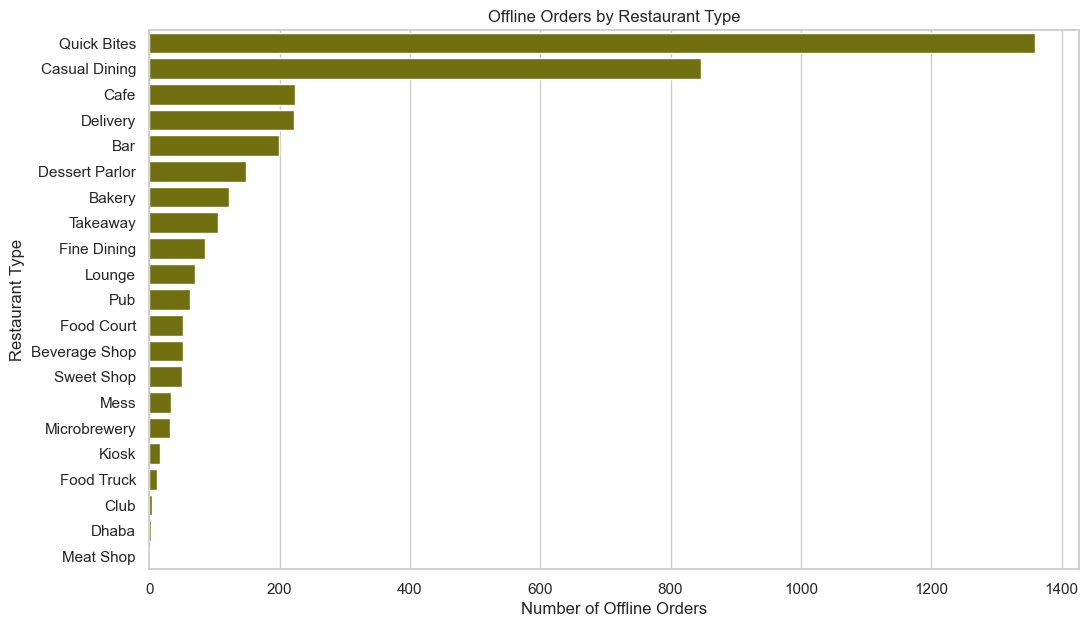

In [22]:
offline_df = df[df['online_order'] == 'No']

offline_df_exploded = offline_df.assign(restaurant_type=offline_df['restaurant type'].str.split(',')).explode('restaurant_type')
offline_df_exploded['restaurant_type'] = offline_df_exploded['restaurant_type'].str.strip()

# Countplot for Offline Orders by Restaurant Type
plt.figure(figsize=(12, 7))
sns.countplot(y='restaurant_type', data=offline_df_exploded, color = 'olive', order=offline_df_exploded['restaurant_type'].value_counts().index)
plt.title('Offline Orders by Restaurant Type')
plt.xlabel('Number of Offline Orders')
plt.ylabel('Restaurant Type')
plt.show()

**Observations:**
- **Casual Dining Dominance:** Casual Dining restaurants have the highest number of offline orders, significantly surpassing other restaurant types.
- **Quick Bites and Cafe Popularity:** Quick Bites and Cafes follow closely behind Casual Dining, indicating substantial offline order volumes for these segments.
- **Tailing Off:** As we move down the chart, the number of offline orders decreases rapidly, with many restaurant types having relatively low numbers.
- **Minimal Offline Orders:** Several restaurant types, such as Food Trucks, Clubs, Dhabhas, and Meat Shops, have negligible or no offline orders.

## Top expensive restaurant for two people

In [25]:
df[['restaurant name','avg cost (two people)']].sort_values(by='avg cost (two people)' , ascending=False)[:10]

,restaurant name,avg cost (two people)
3561,Le Cirque Signature - The Leela Palace,6000.0
5090,Royal Afghan - ITC Windsor,5000.0
3761,Malties - Radisson Blu,4500.0
3485,La Brasserie - Le Meridien,4100.0
5040,Riwaz - The Ritz-Carlton,4000.0
2448,Grill 99 - The Ritz-Carlton,4000.0
1677,Dakshin - ITC Windsor,4000.0
3011,Jamavar - The Leela Palace,4000.0
218,Alba - JW Marriott Bengaluru,4000.0
3831,Masala Klub - The Taj West End,4000.0


**Observations and Insights:**

1. **Luxury Dining Dominance:** High-end restaurants in luxury hotels like **Le Cirque Signature** (₹6000), **Royal Afghan**, and **Malties** dominate the list, offering premium experiences with gourmet cuisine and exceptional service.

2. **Hotel Affiliation:** All top expensive restaurants are linked to prestigious hotels, reflecting a focus on luxury, premium ingredients, renowned chefs, and sophisticated settings.

3. **Consistent Pricing:** Most restaurants cluster around a **₹4000-₹6000** price range, indicating a stable market segment willing to pay for luxury dining.

4. **Brand Reputation:** Repeated appearances of hotels like **The Leela Palace** and **ITC Windsor** emphasize brand reputation as a key driver of high customer spending, targeting affluent diners.

5. **Business Implications:** Zomato can create curated lists for luxury dining, pursue partnerships with luxury brands, and provide customer insights to enhance these restaurants' offerings.

## Top cheapest restaurant for two people

In [28]:
df[['restaurant name','avg cost (two people)']].sort_values(by='avg cost (two people)' , ascending=True)[:10]

,restaurant name,avg cost (two people)
5850,Srinidhi Sagar Food Line,40.0
5849,Srinidhi Sagar Deluxe,40.0
5303,Savera Cafe,50.0
4230,Nellore Dosa Camp,70.0
4144,Namaste,70.0
1938,Dtink Lab,80.0
597,Bangarpet Chats,80.0
1906,Dosa Cafe,80.0
5123,Ruchi Maayaka,100.0
4107,MyPotli,100.0


**Observations and Insights:**

1. **Extreme Affordability:** These restaurants are highly budget-friendly, with costs ranging from **₹40** to **₹100** for two people, making them accessible to a wide demographic.

2. **Casual Dining:** These venues likely offer simple, no-frills dining, with a focus on local, street-style food such as South Indian dishes, appealing to students, commuters, and budget-conscious diners.

3. **Local Focus:** Establishments like **Srinidhi Sagar** cater to niche, localized markets, likely in high foot traffic areas, offering quick and inexpensive meals.

4. **Simple Menus:** The low prices suggest limited, focused menus that allow for cost efficiency and quick service, with a likely specialization in specific dishes.

5. **Target Demographic:** These spots primarily attract students, working-class individuals, and those seeking authentic, local flavors at a low cost, serving as everyday dining options.

6. **Business Implications:** To maintain profitability, these restaurants might focus on high volume sales, quick service, and customer retention strategies. Zomato could highlight them in categories like "Affordable Eats" to attract budget-conscious users.

## Online Ordering and Table Booking Availability

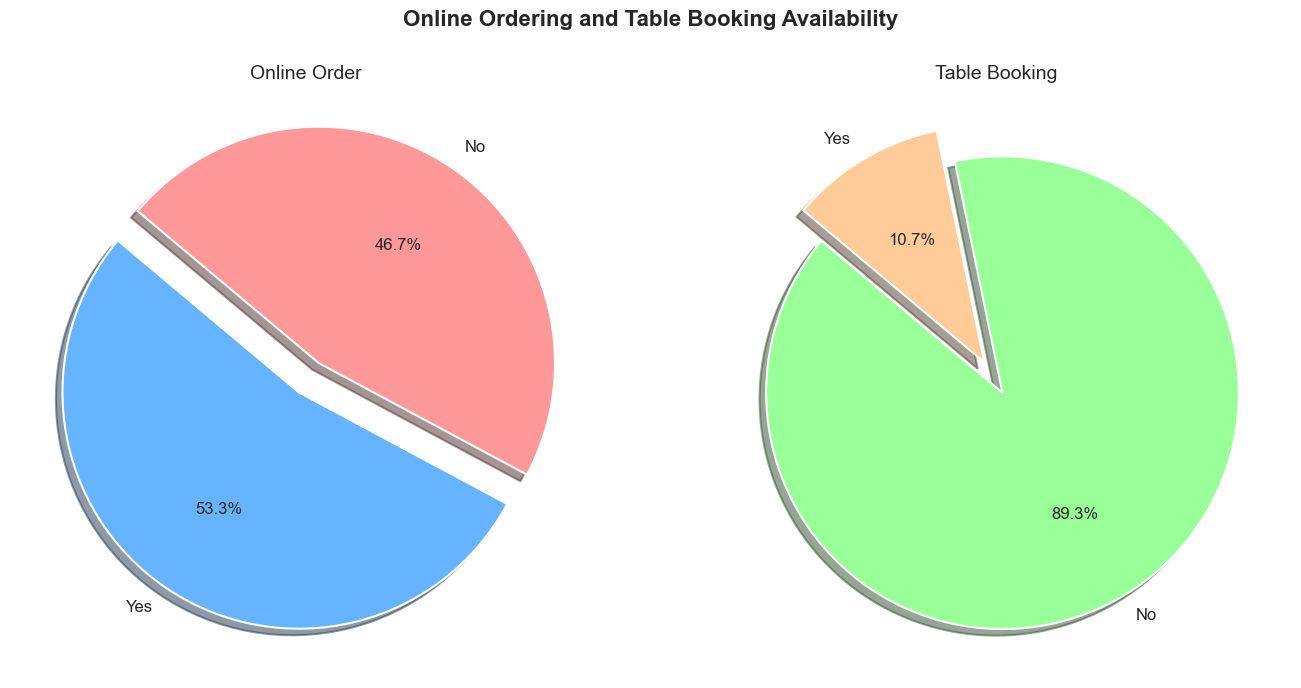

In [31]:
Boolean_features = ['online_order', 'table booking']

colors = [['#66b3ff', '#ff9999'],  # Colors for 'online_order'
          ['#99ff99', '#ffcc99']]  # Colors for 'table booking'

plt.figure(figsize=(14, 7))
plt.suptitle('Online Ordering and Table Booking Availability', fontsize=16, fontweight='bold')

for inx, feature in enumerate(Boolean_features):
    plt.subplot(1, 2, inx + 1)
    values = df[feature].value_counts()
    plt.pie(values, 
            labels=values.keys(), 
            autopct='%1.1f%%', 
            explode=[0.05, 0.1], 
            startangle=140, 
            colors=colors[inx],
            textprops={'fontsize': 12},
            shadow=True,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
    plt.title(f'{feature.replace("_", " ").title()}', fontsize=14, fontweight='medium')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key Observations:**
- **Online Ordering Prevalence:** A significant majority of restaurants (53.3%) offer online ordering, indicating a strong adoption of this service.
- **Table Booking Less Common:** In contrast, table booking is less prevalent, with only 10.7% of restaurants offering this option.
- **Dominance of No Table Booking:** The overwhelming majority of restaurants (89.3%) do not offer table booking services.

**Insights:**
- **Customer Preference:** The high adoption of online ordering suggests that customers strongly prefer this method for placing orders.
- **Focus Area:** Restaurants might consider investing in table booking systems to cater to a specific customer segment that values reservations.
- **Market Opportunity:** The low penetration of table booking presents an opportunity for platforms to develop targeted solutions for restaurants in this category.
- **Customer Experience:** Offering both online ordering and table booking can enhance the overall customer experience and potentially attract a wider audience.

## Top 20 most served cuisines across restaurants

In [34]:
# Extract all unique cuisines
unique_cuisines = df['cuisines type'].str.split(',', expand=True).stack().str.strip().unique()

# Sort and count unique cuisines
unique_cuisines_sorted = sorted(unique_cuisines)
num_unique_cuisines = len(unique_cuisines_sorted)

print(unique_cuisines_sorted)
print(f"Total unique cuisines: {num_unique_cuisines}")

['Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Bohri', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Desserts', 'Drinks Only', 'European', 'Fast Food', 'Finger Food', 'French', 'German', 'Goan', 'Greek', 'Grill', 'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'Iranian', 'Italian', 'Japanese', 'Jewish', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mithai', 'Modern Indian', 'Momos', 'Mongolian', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Oriya', 'Paan', 'Pan Asian', 'Parsi', 'Pizza', 'Portuguese', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Russia

In [35]:
cuisine_counts = df['cuisines type'].str.split(',', expand=True).stack().str.strip().value_counts()

top_20_cuisines = cuisine_counts.head(20).to_dict()

top_20_cuisines

{'North Indian': 3197,
 'Chinese': 2399,
 'South Indian': 1437,
 'Fast Food': 1014,
 'Biryani': 919,
 'Continental': 731,
 'Desserts': 529,
 'Beverages': 520,
 'Cafe': 512,
 'Street Food': 391,
 'Italian': 380,
 'Bakery': 294,
 'Andhra': 286,
 'Seafood': 265,
 'Mughlai': 229,
 'Pizza': 216,
 'Kerala': 215,
 'Rolls': 189,
 'Burger': 184,
 'Asian': 177}

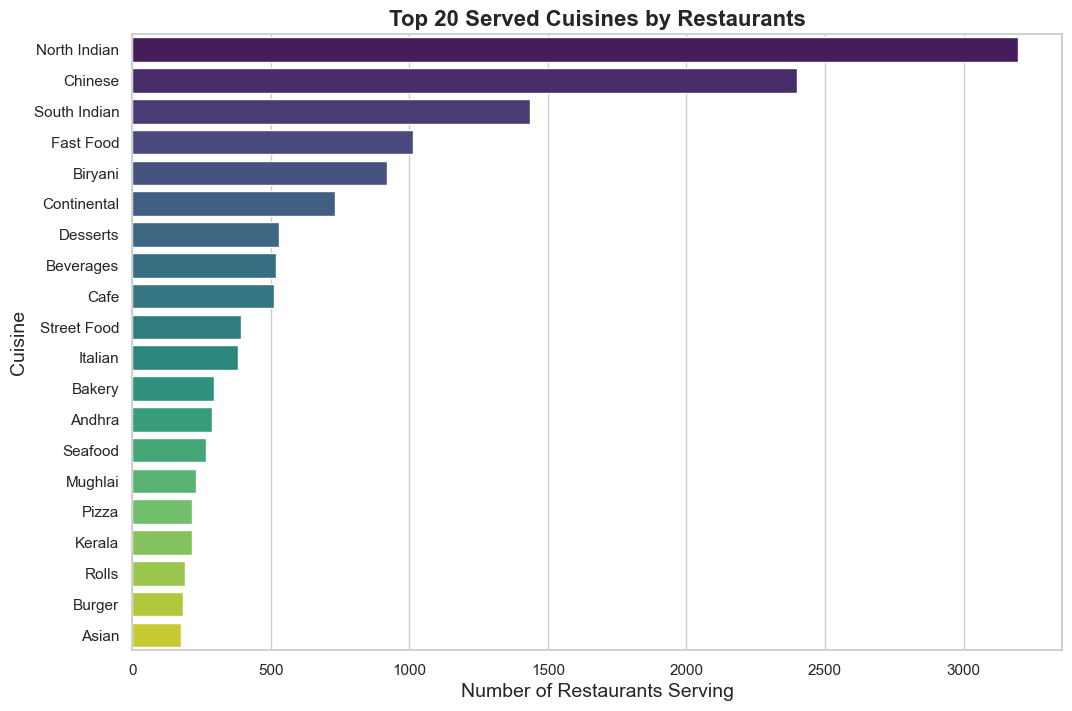

In [36]:
top_20_cuisines_series = pd.Series(top_20_cuisines)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_cuisines_series.values, 
            y=top_20_cuisines_series.index, 
            hue=top_20_cuisines_series.index, 
            palette="viridis", 
            dodge=False, 
            legend=False)
plt.title('Top 20 Served Cuisines by Restaurants', fontsize=16, fontweight='bold')
plt.xlabel('Number of Restaurants Serving', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)
plt.show()

**Observations:**

- **North Indian Dominance:** North Indian cuisine clearly reigns supreme, with a significantly higher number of restaurants serving it compared to any other cuisine.
- **Chinese and South Indian Popularity:** Chinese and South Indian cuisines follow closely behind North Indian, indicating strong demand for these options.
- **Tiered Distribution:** The chart demonstrates a tiered distribution, with a few highly popular cuisines at the top and a gradual decrease in popularity as we move down the list.
- **Diverse Cuisine Landscape:** The presence of a wide range of cuisines, from continental and fast food to regional specialties like Andhra and Kerala, highlights the diverse culinary landscape on the platform.

**Insights:**

- **Customer Preference:** North Indian, Chinese, and South Indian cuisines appear to be the most preferred choices among customers, as evidenced by the number of restaurants offering them.
- **Market Potential:** While North Indian cuisine is already well-represented, there might be untapped potential for restaurants specializing in other popular cuisines like Continental, Fast Food, and Biryani.
- **Regional Variations**: Exploring regional differences in cuisine preferences could offer valuable insights for targeted marketing and expansion strategies.
- **Niche Cuisines:** Cuisines like Andhra, Kerala, and Mughlai, while less prevalent, might cater to specific customer segments and offer opportunities for differentiation.

##  Areas which have the highest concentration of restaurants

In [39]:
num_unique_areas = df['area'].nunique()
print(f'The number of unique areas: {num_unique_areas}')

unique_areas = df['area'].unique()
print(unique_areas)

The number of unique areas: 30
['Bellandur' 'Byresandra,Tavarekere,Madiwala' 'Bannerghatta Road'
 'Marathahalli' 'Whitefield' 'Banashankari' 'Indiranagar'
 'Electronic City' 'Old Airport Road' 'Basavanagudi' 'Malleshwaram'
 'Kalyan Nagar' 'Rajajinagar' 'Brigade Road' 'Koramangala 7th Block'
 'JP Nagar' 'Lavelle Road' 'Sarjapur Road' 'HSR' 'Frazer Town'
 'Kammanahalli' 'New BEL Road' 'Jayanagar' 'Brookefield'
 'Koramangala 5th Block' 'Koramangala 4th Block' 'Church Street' 'MG Road'
 'Residency Road' 'Koramangala 6th Block']


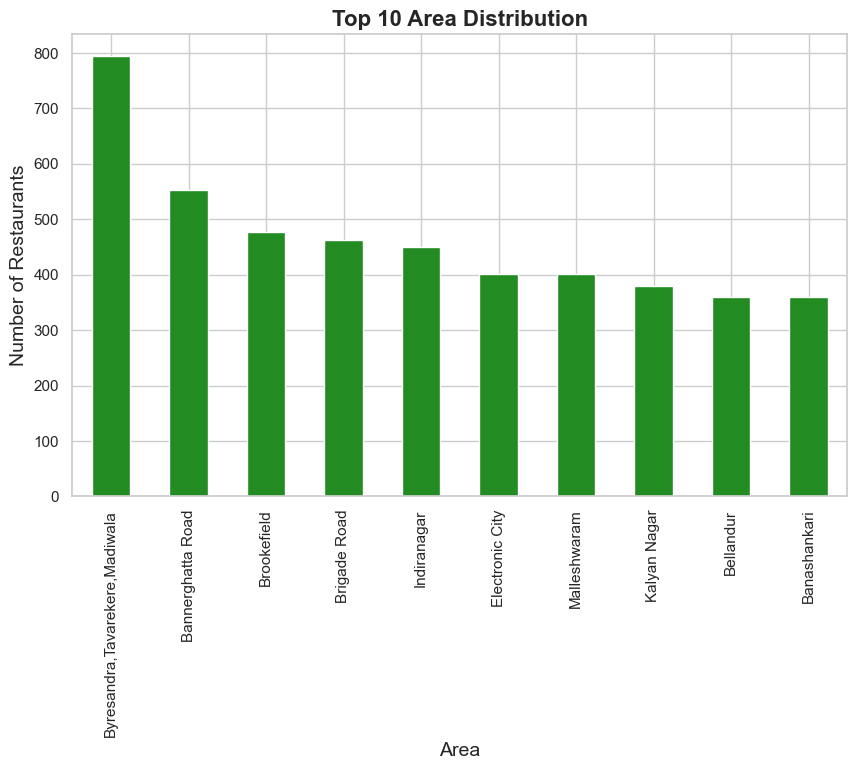

In [40]:
# Plot the area distribution
plt.figure(figsize=(10, 6))
df['area'].value_counts().head(10).plot(kind='bar', color='forestgreen')
plt.title('Top 10 Area Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.show()

**Insights:**
1. **Dominant Area:** *Byresandra, Tavarekere, Madiwala* is the standout area with the highest number of restaurants, nearing 800. This indicates a significant concentration of dining establishments in this area, likely due to a high demand or a densely populated community.
2. **Second-Tier Areas:** *Bannerghatta Road* has the second-highest number of restaurants, with around 600, followed by *Brookefield* and *Brigade Road*, each having approximately 450-500 restaurants. These areas are also major hubs for dining but are considerably behind the leading area.
3. **Even Distribution:** The next set of areas, including *Indiranagar*, *Electronic City*, *Malleshwaram*, *Kalyan Nagar*, *Bellandur*, and *Banashankari*, have a relatively even distribution of restaurants, each hosting around 350-450 establishments.
4. **Gap in Restaurant Numbers:** There is a noticeable gap between *Byresandra, Tavarekere, Madiwala* and the other areas, with a difference of nearly 200-300 restaurants between the top area and the second-highest, *Bannerghatta Road*.

**Possible Actions:**
- **Strategic Focus on Byresandra, Tavarekere, Madiwala:** Given the exceptionally high number of restaurants in *Byresandra, Tavarekere, Madiwala*, Zomato could focus on optimizing services, such as delivery efficiency and customer service, to maintain or enhance customer satisfaction.
- **Growth Potential in Lower-Tier Areas:** Areas like *Kalyan Nagar* and *Banashankari* might benefit from promotional efforts or incentives to attract new restaurants, thereby increasing their share in the market.
- **Balanced Resource Allocation:** With several areas having a similar number of restaurants (350-450), Zomato should ensure balanced resource allocation to these regions, avoiding over-concentration in a single area and ensuring all areas receive adequate support.

##  Local addresses which have the highest concentration of restaurants

In [43]:
num_unique_addresses = df['local address'].nunique()
print(f'The number of unique local addresses: {num_unique_addresses}')

unique_addresses = df['local address'].unique()
print(unique_addresses)

The number of unique local addresses: 90
['Bellandur' 'HSR' 'Bannerghatta Road' 'Marathahalli' 'Whitefield'
 'Kumaraswamy Layout' 'Old Airport Road' 'Koramangala 5th Block' 'BTM'
 'Electronic City' 'Indiranagar' 'Koramangala 3rd Block' 'JP Nagar'
 'Malleshwaram' 'Kammanahalli' 'Rajajinagar' 'Basavanagudi'
 'Infantry Road' 'Kalyan Nagar' 'Church Street' 'Jayanagar'
 'Cunningham Road' 'Seshadripuram' 'Banaswadi' 'Kaggadasapura'
 'Wilson Garden' 'Banashankari' 'Race Course Road' 'Koramangala 6th Block'
 'CV Raman Nagar' 'Brigade Road' 'Nagawara' 'New BEL Road'
 'Koramangala 1st Block' 'Brookefield' 'Jeevan Bhima Nagar' 'Hennur'
 'Basaveshwara Nagar' 'Kanakapura Road' 'Yeshwantpur' 'Ejipura'
 'Frazer Town' 'Koramangala 7th Block' 'Bommanahalli' 'Sarjapur Road'
 'Thippasandra' 'Sanjay Nagar' 'Shanti Nagar' 'RT Nagar' 'Lavelle Road'
 'Ulsoor' 'Vijay Nagar' 'Vasanth Nagar' 'Sadashiv Nagar' 'City Market'
 'Shivajinagar' 'Magadi Road' 'Richmond Road' 'Residency Road'
 'Koramangala' 'Domlur' 'Ea

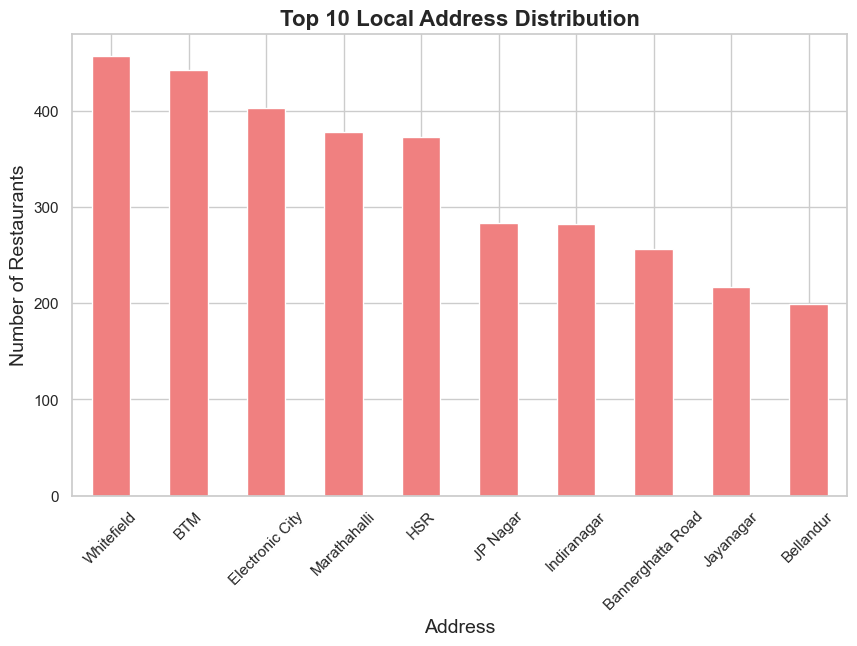

In [44]:
# Plot the local address distribution
plt.figure(figsize=(10, 6))
df['local address'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Local Address Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Address', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insights:**
1. **Top Area by Restaurant Count:** *Whitefield* has the highest number of restaurants among the top 10 areas, with over 400 restaurants. This suggests it is a major hub for dining options.
2. **Close Contenders:** *BTM* and *Electronic City* also have a high number of restaurants, close to *Whitefield*, indicating these areas are also significant restaurant hubs.
3. **Mid-Range:** *Marathahalli* and *HSR* have around 350-380 restaurants each, making them prominent areas but slightly behind the top three.
4. **Lower End of Top 10:** *Jayanagar* and *Bellandur* have fewer restaurants, with counts just above 200. They are still within the top 10 but have noticeably fewer dining options compared to the other areas.
5. **Restaurant Density:** The distribution suggests that certain areas, such as *Whitefield* and *BTM*, have a high restaurant density, which could be due to larger residential or commercial populations in these areas.

**Possible Actions:**
- **Resource Allocation:** Zomato could consider allocating more resources, such as delivery personnel, in high-density areas like *Whitefield* and *BTM* to ensure timely deliveries and customer satisfaction.
- **Market Expansion:** Areas with slightly fewer restaurants, like *Jayanagar* and *Bellandur*, might be targeted for growth opportunities, potentially by encouraging new restaurants to open or by offering promotions to attract more customers.
- **Competitive Analysis:** It may be beneficial to conduct further analysis in the top three areas to understand what factors are driving the high concentration of restaurants and how Zomato can leverage this.

## What areas in the city have the highest concentration of top-rated restaurants?

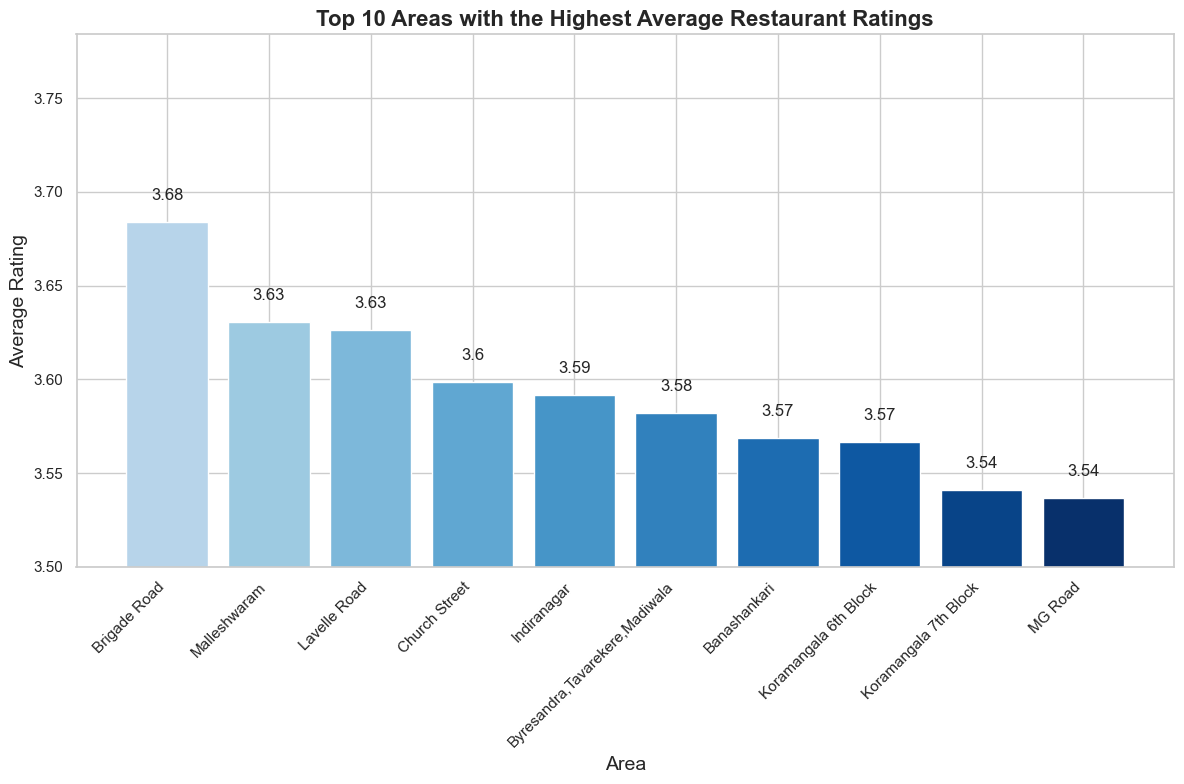

In [48]:
df['rate (out of 5)'] = pd.to_numeric(df['rate (out of 5)'], errors='coerce')
df = df.dropna(subset=['rate (out of 5)'])

area_avg_rating = df.groupby('area')['rate (out of 5)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
top_areas = area_avg_rating.head(10)
bars = plt.bar(top_areas.index, top_areas, color=plt.cm.Blues(np.linspace(0.3, 1, len(top_areas))))

plt.title('Top 10 Areas with the Highest Average Restaurant Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.ylim(3.5, top_areas.max() + 0.1)
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the rating values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

**Insights:**
1. **Top Performing Area:** *Brigade Road* has the highest average restaurant rating of 3.68, indicating that it is likely a popular area with well-rated restaurants.
2. **Close Competition:** *Malleshwaram* and *Lavelle Road* follow closely with average ratings of 3.63. These areas are also highly rated and may be known for quality dining options.
3. **Slight Drop-Off:** There is a slight drop in the ratings as we move down the list. For example, *Church Street* and *Indiranagar* have ratings of 3.60 and 3.59, respectively.
4. **Bottom of the Top 10:** *MG Road* and *Koramangala 7th Block* are at the bottom with an average rating of 3.54. While they are still among the top 10, their ratings are lower compared to the other areas.
5. **Rating Range:** The range of average ratings in these top 10 areas is quite narrow (3.54 to 3.68), suggesting that the differences in quality among the top areas are minimal but can still influence customer preferences.

**Possible Actions:**
- **Targeting High-Performance Areas:** Zomato could consider focusing marketing efforts in top-performing areas like *Brigade Road* to further boost restaurant visibility and customer engagement.
- **Improvement Programs:** For areas with slightly lower ratings, Zomato could explore initiatives to improve restaurant quality or customer satisfaction, potentially raising their ratings closer to the top.